In [19]:
import pickle

from base import Point, plot_points
from graphs import Graph, SingleNode, dag_frontier_best_effort, plot_utopia_nadir, graph_pareto_front_naive

In [2]:
A, B, C, D, E, F = [SingleNode.random(5) for _ in range(6)]
g = Graph('', {
    D: [A],
    A: [B, C],
    B: [E],
    E: [C],
    C: [F]
})

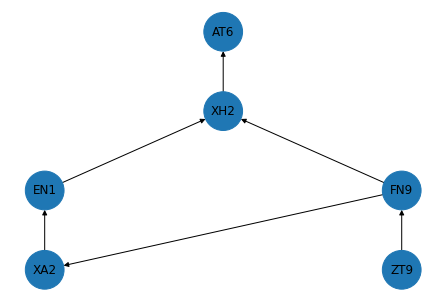

In [3]:
g.draw()

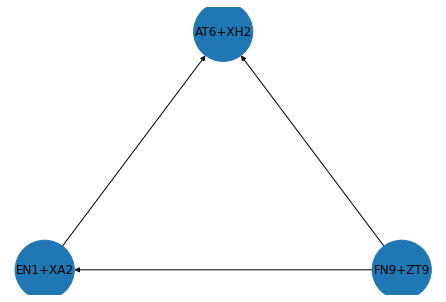

In [4]:
g.with_compressed_lists().draw()

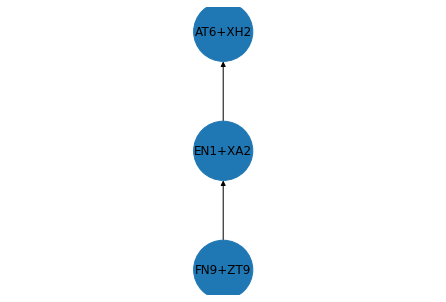

In [5]:
g.with_compressed_lists().without_unnecessary_dependencies().draw()

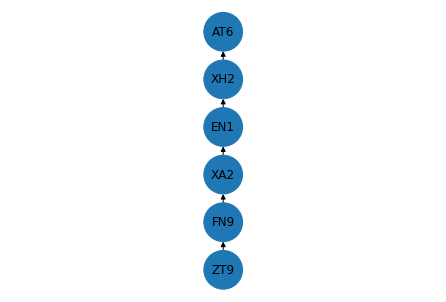

In [6]:
g.without_unnecessary_dependencies().draw()

In [7]:
%time _ = dag_frontier_best_effort(g)

CPU times: user 6.47 ms, sys: 3.86 ms, total: 10.3 ms
Wall time: 9.33 ms


In [8]:
import matplotlib.pyplot as plt

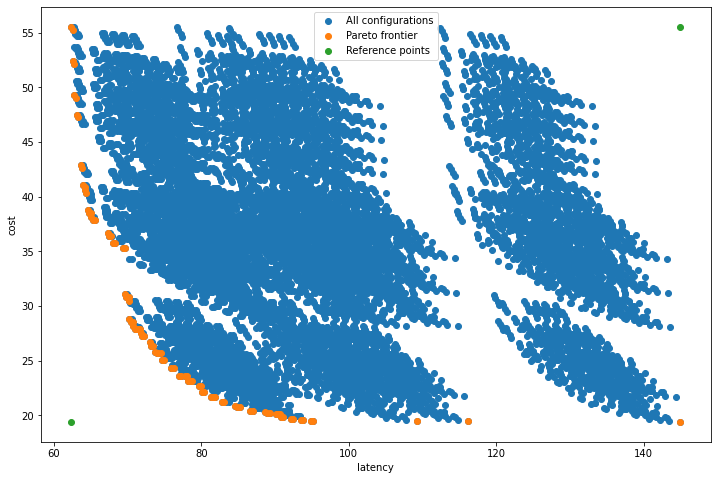

In [9]:
plt.figure(figsize=(12, 8))
g.without_unnecessary_dependencies().plot_frontier(plt)
plot_utopia_nadir(plt, g)
plt.xlabel('latency')
plt.ylabel('cost')
plt.legend()
plt.show()

In [10]:
def read_graph(g):
    name = g['name']
    stages = dict()
    for stage in g['stage_data']:
        stage_name = stage['name']
        frontier = [Point(latency, cost) for (latency, cost) in stage['frontier']]
        stages[stage_name] = SingleNode(stage_name, frontier)
        
    graph = dict()
    for (src, dst) in g['graph']:
        graph[stages[src]] = [stages[x] for x in dst]
    
    return Graph(name, graph)

all_graphs = dict()
with open('./graphs.pkl', 'rb') as f:
    obj = pickle.load(f)
    for g in obj:
        graph = read_graph(g)
        all_graphs[graph.name] = graph

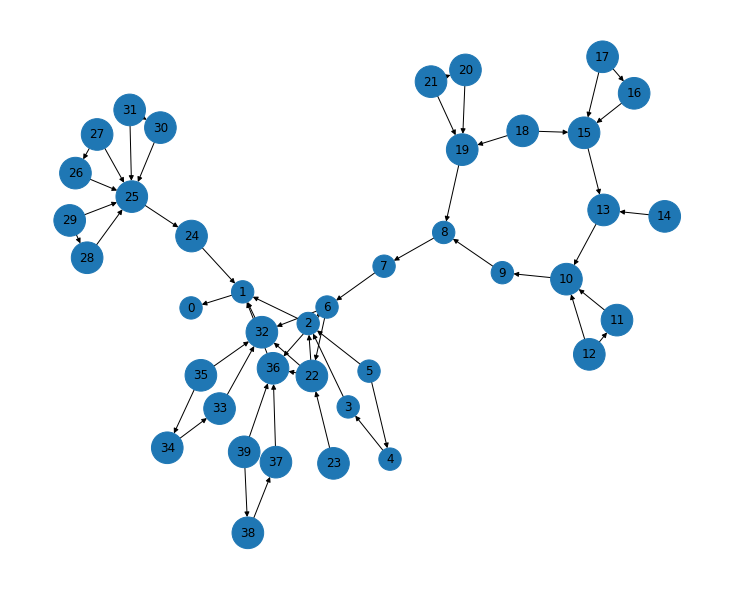

In [11]:
plt.figure(figsize=(10, 8))
all_graphs['tpcds_25'].draw(layout='graphviz')

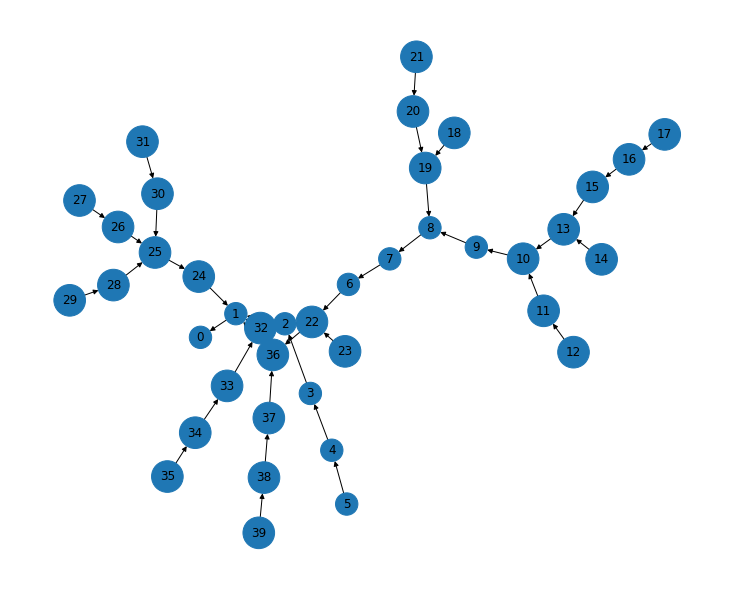

In [12]:
plt.figure(figsize=(10, 8))
all_graphs['tpcds_25'].without_unnecessary_dependencies().draw(layout='graphviz')

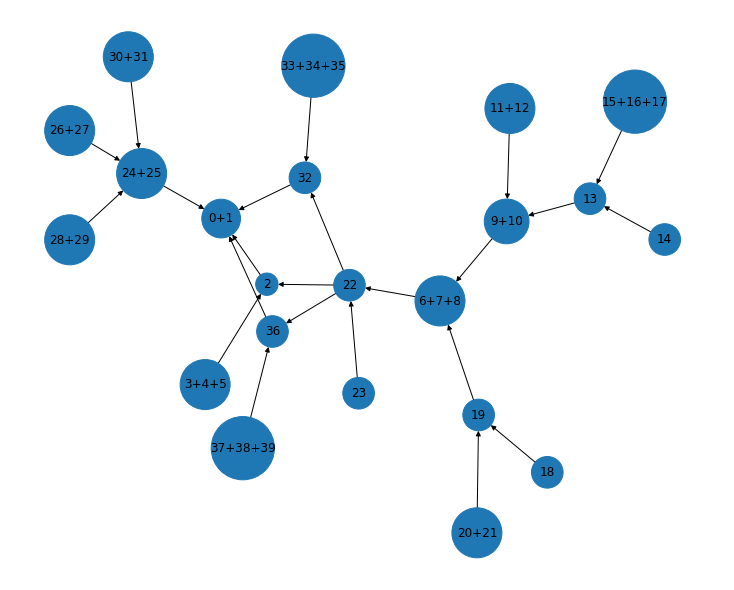

In [13]:
plt.figure(figsize=(10, 8))
all_graphs['tpcds_25'].without_unnecessary_dependencies().with_compressed_lists().draw(layout='graphviz')

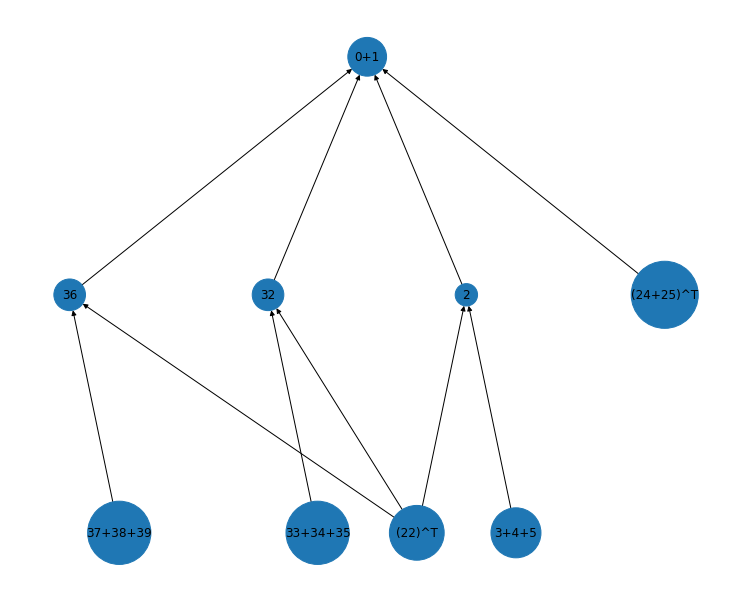

In [14]:
plt.figure(figsize=(10, 8))
all_graphs['tpcds_25'].without_unnecessary_dependencies().with_compressed_lists().with_compressed_subtrees().draw(layout='tree')

In [15]:
%time _ = all_graphs['tpcds_25'].without_unnecessary_dependencies().with_compressed_lists().with_compressed_subtrees().approximate_frontier()

CPU times: user 1.57 s, sys: 23.9 ms, total: 1.59 s
Wall time: 1.59 s


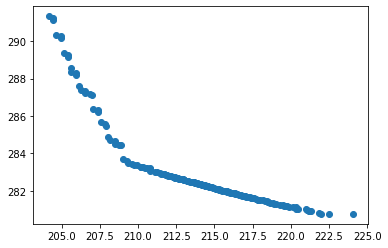

In [17]:
plot_points(plt, all_graphs['tpcds_25'].without_unnecessary_dependencies().with_compressed_lists().with_compressed_subtrees().approximate_frontier())
plt.show()

Warning, the following code may take a very long time to run: <br>
`naive_frontier = graph_pareto_front_naive(all_graphs['tpcds_25'])` <br>